# EDA danych dotycząca Titanica

<b>RMS Titanic</b> brytyjski transatlantyk typu Olympic zbudowany w Belfaście. Zatonął podczas pierwszego 
rejsu w 1912r. w wyniku otarcia o górę lodową.

![zdjęcie Titanica](Titanic_in_color.png)

## O danych
Dane zawierają 1310 wierszów i 14 kolumn - 5 kolumn numerycznych, 5 kategorycznych i 4 tekstowe.
Każdy wiersz dotyczy jednego pasażera.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [75]:
# importujemy biblioteki pythona
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# zapewnienie wyświetlania wszystkich kolumn
pd.set_option('display.max_columns', None)

In [76]:
# załadowanie pliku z danymi do analizy
df = pd.read_csv('26__titanic.csv', sep=",")

## 1. Ogólny przegląd danych

### 1.1. Losowe wiersze

In [77]:
# wyświetlamy 10 losowych wierszów
df.sample(10, random_state=123)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1291,3.0,0.0,"Willer, Mr. Aaron (""Abi Weller"")",male,NaN,0.0,0.0,3410,8.7125,NaN,S,NaN,NaN,NaN
654,3.0,0.0,"Baccos, Mr. Raffull",male,20.0000,0.0,0.0,2679,7.2250,NaN,C,NaN,NaN,NaN
437,2.0,1.0,"Herman, Miss. Alice",female,24.0000,1.0,2.0,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ"
84,1.0,0.0,"Cumings, Mr. John Bradley",male,39.0000,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,"New York, NY"
772,3.0,0.0,"Dika, Mr. Mirko",male,17.0000,0.0,0.0,349232,7.8958,NaN,S,NaN,NaN,NaN
266,1.0,0.0,"Smart, Mr. John Montgomery",male,56.0000,0.0,0.0,113792,26.5500,NaN,S,NaN,NaN,"New York, NY"
590,2.0,1.0,"West, Miss. Barbara J",female,0.9167,1.0,2.0,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
1095,3.0,0.0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0.0,0.0,330909,7.6292,NaN,Q,NaN,NaN,NaN
1015,3.0,0.0,"Meo, Mr. Alfonzo",male,55.5000,0.0,0.0,A.5. 11206,8.0500,NaN,S,NaN,201.0,NaN
1079,3.0,1.0,"Ohman, Miss. Velin",female,22.0000,0.0,0.0,347085,7.7750,NaN,S,C,NaN,NaN


**spostrzeżenie**: W kolumnie 'age' nie wszystkie wartości są liczbami całkowitymi.

In [6]:
%%capture
# sprawdzenie typów danych w poszczególnych kolumnach
df.info()

### 1.2. Wartości unikatowe w kolumnach

In [78]:
# sprawdzenie wartości unikatowych w każdej kolumnie
unique_counts = df.nunique()
unique_df = unique_counts.reset_index()
unique_df.columns = ['Nazwa kolumny', 'Liczba unikalnych wartości']
type(unique_df.style)
unique_df.style

,Nazwa kolumny,Liczba unikalnych wartości
0,pclass,3
1,survived,2
2,name,1307
3,sex,2
4,age,98
5,sibsp,7
6,parch,8
7,ticket,929
8,fare,281
9,cabin,186


**Wstępne wnioski i spostrzeżenia**

- Każdy pasażer podróżował w 1 z 3 klas i wsiadł na 1 z 3 portów.
- Na pokładzie znajdowały się zarówno kobiety, jak i mężczyźni.
- Pasażerowie podróżowali samotnie oraz z rodzinami.
- W kolumnie z wiekiem pasażera występuje 98 unikalnych wartości, ale
nie wszystkie są liczbami całkowitymi, więc nie można 
założyć, że najstarszy pasażer miał 98 lat.

In [8]:
%%capture
# sprawdzenie łącznej liczby zgonów
df['survived'].value_counts()

In [9]:
%%capture
# sprawdzenie liczebności kobiet i mężczyzn
df['sex'].value_counts()

In [10]:
%%capture
# obliczenie podstawowych statystyk dla każdej kolumny
df.describe()

In [11]:
%%capture
# sprawdzamy najliczniejsze rodziny
df_max_family = df[(df['parch'] >= 8)]
df_max_family

## 2. Brakujące wartości i duplikaty

### 2.1. Brakujące wartości i ich udział procentowy

In [79]:
# sprawdzamy wartości brakujące w poszczególnych kolumnach
empty_rows = df.isnull().sum()
empty_rows_percent = (empty_rows / len(df)) * 100
round_empty_rows_percent = empty_rows_percent.round(2)

summary_deficiences = pd.DataFrame({
    'Nazwa kolumny': df.columns,
    'Liczba brakujących wierszy': empty_rows,
    'Liczba brakujących wierszy w %': round_empty_rows_percent
})


summary_deficiences.reset_index(drop=True)

,Nazwa kolumny,Liczba brakujących wierszy,Liczba brakujących wierszy w %
0,pclass,1,0.08
1,survived,1,0.08
2,name,1,0.08
3,sex,1,0.08
4,age,264,20.15
5,sibsp,1,0.08
6,parch,1,0.08
7,ticket,1,0.08
8,fare,2,0.15
9,cabin,1015,77.48


**spostrzeżenie**: W aż 7 kolumnach brakuje dokładnie 1 wiersza, co może sugerować występowanie
całego pustego wiesza.

In [49]:
%%capture
# sprawdzamy istnienie duplikatów
df_clear[df_clear.duplicated()]

**Wnioski i spostrzeżenia**

Zduplikowane wiersze nie występują. Znaczne braki danych występują w 5 kolumnach. Niedobór informacji odnoszących się do numeru kabiny można wytłumaczyć faktem, że pasażerowie z 2. i 3. klasy biletowej po prostu ich nie wykupowali. Podobnie w przypadku nr łodzi ratunkowej - brak wartości prawdopodobnie oznacza, że pasażer nie wykupił w niej miejsca. Braki dotyczące numeru ciała są zrozumiałe - części martwych ciał nie odnalezione, a część osób po prostu przeżyła, więc nie byli numerowani.
Dziwić może natomiat fakt braku danych odnośnie celu podróży pasażerów, który powinien być określony przed wejściem na pokład statku oraz braki dotyczące wieku pasażerów (braki u ok. 20% wszystkich pasażerów).

## 3. Transformacja danych

### 3.1. Dodanie nowych kolumn, zmiana ich nazw i kolejności

In [80]:
# dodanie nowej kolumny jako string
df['Czy przeżył str'] = df['survived'].map({1.0: 'tak', 0.0: 'nie'})

In [81]:
df['Czy miał łódź'] = np.where(df['boat'].isna(), 'nie wiadomo', 'tak')

In [82]:
# zmiana nazw i kolejności kolumn dla lepszej czytelności
df = df.rename(columns = {
    'pclass': 'Klasa',
    'survived': 'Czy przeżył int',
    'name': 'Imię i nazwisko',
    'sex': 'Płeć',
    'age': 'Wiek',
    'sibsp': 'Rodzeństwo/małżonkowie',
    'parch': 'Rodzice/dzieci',
    'ticket': 'Nr biletu',
    'fare': 'Cena',
    'cabin': 'Nr kabiny',
    'embarked': 'Port wejścia',
    'boat': 'Nr łodzi',
    'body': 'Nr ciała',
    'home.dest': 'Port docelowy'
    })
df['Płeć'] = df['Płeć'].map({'male': 'mężczyzna', 'female': 'kobieta'})
df = df[['Imię i nazwisko', 'Czy przeżył str', 'Klasa',  'Płeć', 'Wiek', 'Rodzeństwo/małżonkowie', 'Rodzice/dzieci', 'Cena', 'Nr biletu', 'Nr kabiny', 'Port wejścia', 'Nr łodzi', 'Nr ciała', 'Port docelowy', 'Czy przeżył int', 'Czy miał łódź']]
df.sample(10, random_state=123)

,Imię i nazwisko,Czy przeżył str,Klasa,Płeć,Wiek,Rodzeństwo/małżonkowie,Rodzice/dzieci,Cena,Nr biletu,Nr kabiny,Port wejścia,Nr łodzi,Nr ciała,Port docelowy,Czy przeżył int,Czy miał łódź
1291,"Willer, Mr. Aaron (""Abi Weller"")",nie,3.0,mężczyzna,NaN,0.0,0.0,8.7125,3410,NaN,S,NaN,NaN,NaN,0.0,nie wiadomo
654,"Baccos, Mr. Raffull",nie,3.0,mężczyzna,20.0000,0.0,0.0,7.2250,2679,NaN,C,NaN,NaN,NaN,0.0,nie wiadomo
437,"Herman, Miss. Alice",tak,2.0,kobieta,24.0000,1.0,2.0,65.0000,220845,NaN,S,9,NaN,"Somerset / Bernardsville, NJ",1.0,tak
84,"Cumings, Mr. John Bradley",nie,1.0,mężczyzna,39.0000,1.0,0.0,71.2833,PC 17599,C85,C,NaN,NaN,"New York, NY",0.0,nie wiadomo
772,"Dika, Mr. Mirko",nie,3.0,mężczyzna,17.0000,0.0,0.0,7.8958,349232,NaN,S,NaN,NaN,NaN,0.0,nie wiadomo
266,"Smart, Mr. John Montgomery",nie,1.0,mężczyzna,56.0000,0.0,0.0,26.5500,113792,NaN,S,NaN,NaN,"New York, NY",0.0,nie wiadomo
590,"West, Miss. Barbara J",tak,2.0,kobieta,0.9167,1.0,2.0,27.7500,C.A. 34651,NaN,S,10,NaN,"Bournmouth, England",1.0,tak
1095,"O'Sullivan, Miss. Bridget Mary",nie,3.0,kobieta,NaN,0.0,0.0,7.6292,330909,NaN,Q,NaN,NaN,NaN,0.0,nie wiadomo
1015,"Meo, Mr. Alfonzo",nie,3.0,mężczyzna,55.5000,0.0,0.0,8.0500,A.5. 11206,NaN,S,NaN,201.0,NaN,0.0,nie wiadomo
1079,"Ohman, Miss. Velin",tak,3.0,kobieta,22.0000,0.0,0.0,7.7750,347085,NaN,S,C,NaN,NaN,1.0,tak


### 3.2. Sprawdzenie występowania pustego wiersza

In [83]:
last_rows = df.tail(10)
last_rows.style.highlight_null(color="darkred")

def highlight_row(row):
    # Przyjmujemy, że chcemy stylować tylko wiersz o indeksie 1309
    if row.name == 1309:
        return ['background-color: darkred; text-decoration: line-through'] * len(row)
    else:
        return [''] * len(row)

# Stosowanie stylizacji
styled_df = last_rows.style.apply(highlight_row, axis=1)

# Wyświetlenie ostylowanego DataFrame
styled_df

,Imię i nazwisko,Czy przeżył str,Klasa,Płeć,Wiek,Rodzeństwo/małżonkowie,Rodzice/dzieci,Cena,Nr biletu,Nr kabiny,Port wejścia,Nr łodzi,Nr ciała,Port docelowy,Czy przeżył int,Czy miał łódź
1300,"Yasbeck, Mrs. Antoni (Selini Alexander)",tak,3.000000,kobieta,15.000000,1.000000,0.000000,14.454200,2659,nan,C,nan,nan,nan,1.000000,nie wiadomo
1301,"Youseff, Mr. Gerious",nie,3.000000,mężczyzna,45.500000,0.000000,0.000000,7.225000,2628,nan,C,nan,312.000000,nan,0.000000,nie wiadomo
1302,"Yousif, Mr. Wazli",nie,3.000000,mężczyzna,nan,0.000000,0.000000,7.225000,2647,nan,C,nan,nan,nan,0.000000,nie wiadomo
1303,"Yousseff, Mr. Gerious",nie,3.000000,mężczyzna,nan,0.000000,0.000000,14.458300,2627,nan,C,nan,nan,nan,0.000000,nie wiadomo
1304,"Zabour, Miss. Hileni",nie,3.000000,kobieta,14.500000,1.000000,0.000000,14.454200,2665,nan,C,nan,328.000000,nan,0.000000,nie wiadomo
1305,"Zabour, Miss. Thamine",nie,3.000000,kobieta,nan,1.000000,0.000000,14.454200,2665,nan,C,nan,nan,nan,0.000000,nie wiadomo
1306,"Zakarian, Mr. Mapriededer",nie,3.000000,mężczyzna,26.500000,0.000000,0.000000,7.225000,2656,nan,C,nan,304.000000,nan,0.000000,nie wiadomo
1307,"Zakarian, Mr. Ortin",nie,3.000000,mężczyzna,27.000000,0.000000,0.000000,7.225000,2670,nan,C,nan,nan,nan,0.000000,nie wiadomo
1308,"Zimmerman, Mr. Leo",nie,3.000000,mężczyzna,29.000000,0.000000,0.000000,7.875000,315082,nan,S,nan,nan,nan,0.000000,nie wiadomo
1309,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nie wiadomo


**spostrzeżenie**: Wiersz o indeksie 1309 jest pusty, więc go usuwamy.

Ponowne sprawdzenie brakujących wartości w kolumnach

In [84]:
# tworzymy kopię DataFrame
df_clear = df.copy()
# usuwamy pusty wiersz
df_clear = df_clear.dropna(subset=['Klasa'])

empty_clear_rows = df_clear.isnull().sum()
empty_clear_percent = (empty_clear_rows / len(df_clear)) * 100
round_empty_clear_percent = empty_clear_percent.round(2)

summary_deficiences_clear = pd.DataFrame({
    'Nazwa kolumny': df_clear.columns,
    'Liczba brakujących wierszy': empty_clear_rows,
    'Liczba brakujących wierszy w %': round_empty_clear_percent
})

summary_deficiences_clear.reset_index(drop=True)

,Nazwa kolumny,Liczba brakujących wierszy,Liczba brakujących wierszy w %
0,Imię i nazwisko,0,0.00
1,Czy przeżył str,0,0.00
2,Klasa,0,0.00
3,Płeć,0,0.00
4,Wiek,263,20.09
5,Rodzeństwo/małżonkowie,0,0.00
6,Rodzice/dzieci,0,0.00
7,Cena,1,0.08
8,Nr biletu,0,0.00
9,Nr kabiny,1014,77.46


**spostrzeżenie**: Po usunięciu pustego wiersza o indeksie 1309, pojedyncze braki w ww. 7 kolumnach już nie występują.

### 3.3. Komentarz do transformacji
Transformacja danych poprawia znacznie ich czytelność oraz ułatwia tworzenie późniejszych
wizualizacji.

## 4. Badanie pojedynczych kolumn

### 4.1. Płeć

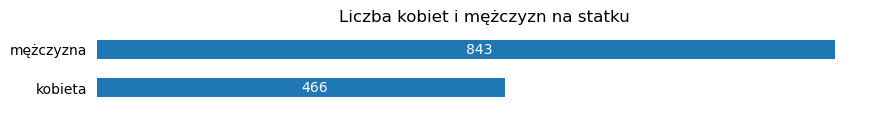

In [86]:
# wykres słupkowy prezentujący liczbę kobiet i mężczyzn
sex_counts = df_clear['Płeć'].value_counts().sort_index()


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(10,1))
ax = sex_counts.plot(kind='barh')

# Dodawanie wartości na każdym słupku
for index, value in enumerate(sex_counts):
    plt.text(value / 2, index, str(value), va='center', ha='left', color='white')

# Usuwanie osi x i ramki wokół wykresu
ax.get_xaxis().set_visible(False)  # Ukryj oś x
#ax.get_yaxis().set_visible(False)  # Ukryj oś y
ax.spines['top'].set_visible(False)  # Ukryj górną ramkę
ax.spines['right'].set_visible(False)  # Ukryj prawą ramkę
ax.spines['left'].set_visible(False)  # Ukryj lewą ramkę
ax.spines['bottom'].set_visible(False)  # Ukryj dolną ramkę

# Ukrywanie ticków osi y
ax.yaxis.set_ticks_position('none')

# Nadawanie tytułu i etykiet osi bez ich wyświetlania może być opcjonalne
plt.title('Liczba kobiet i mężczyzn na statku')
plt.ylabel('')

plt.show()

**spostrzeżenie**: Mężczyźni stanowili ok. 64% wszystkich pasażerów, a kobiety ok. 36%.

### 4.2. Wiek

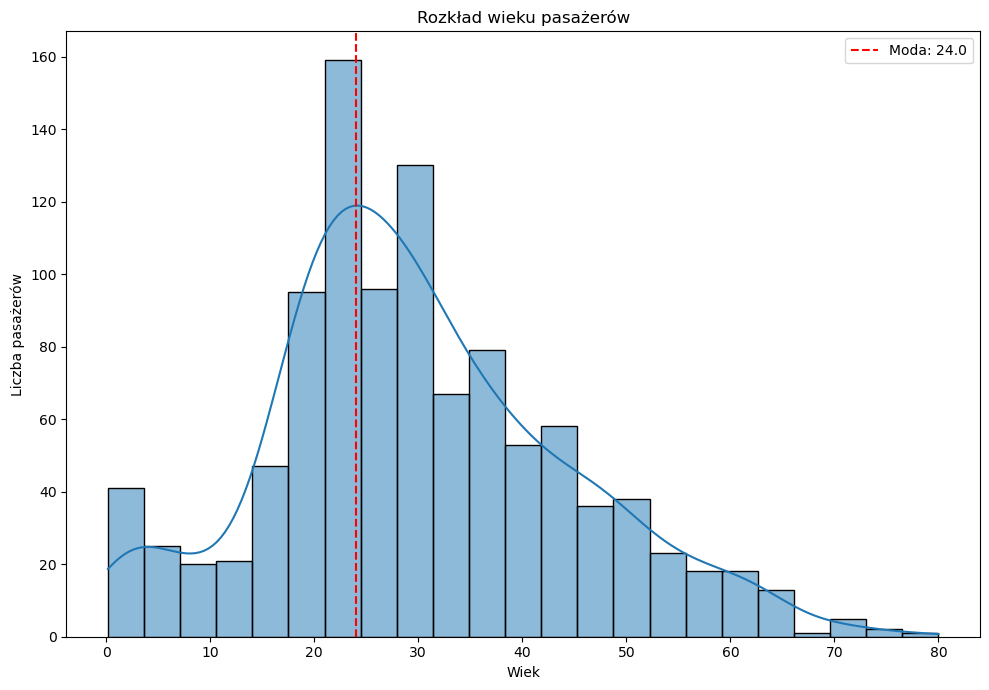

In [87]:
# tworzymy histogram dla wieku
# tworzymy zmienną przechowującą informcaje o wieku pasażerów po usunięciu pustych wierszów
ages_counts = df_clear['Wiek'].dropna()

# Obliczanie mody
mode_value = ages_counts.mode().iloc[0]

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(10, 7))

# tworzymy histogram
sns.histplot(ages_counts, kde=True)

# Dodawanie pionowej linii reprezentującej modę
plt.axvline(mode_value, color='red', linestyle='--', label=f'Moda: {mode_value}')

# Dodanie legendy
plt.legend()

plt.title('Rozkład wieku pasażerów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

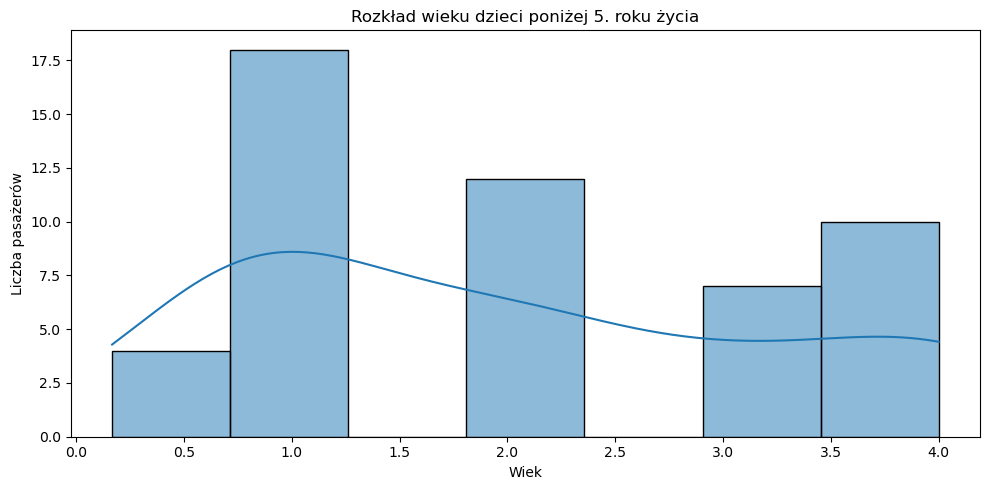

In [88]:
# tworzymy histogram dla wieku dzieci poniżej 10 roku życia i usuwamy wiersze z brakującymi wartościami
# tworzymy zmienną przechowującą informacje na temat dzieci poniżej 10 roku życia  i usuwamy wiersze z brakującymi wartościami
ages_children_counts = df_clear[(df_clear['Wiek'] < 5)] 

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(10, 5))

# tworzymy histogram
sns.histplot(ages_children_counts['Wiek'].dropna(), kde=True)
plt.title('Rozkład wieku dzieci poniżej 5. roku życia')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

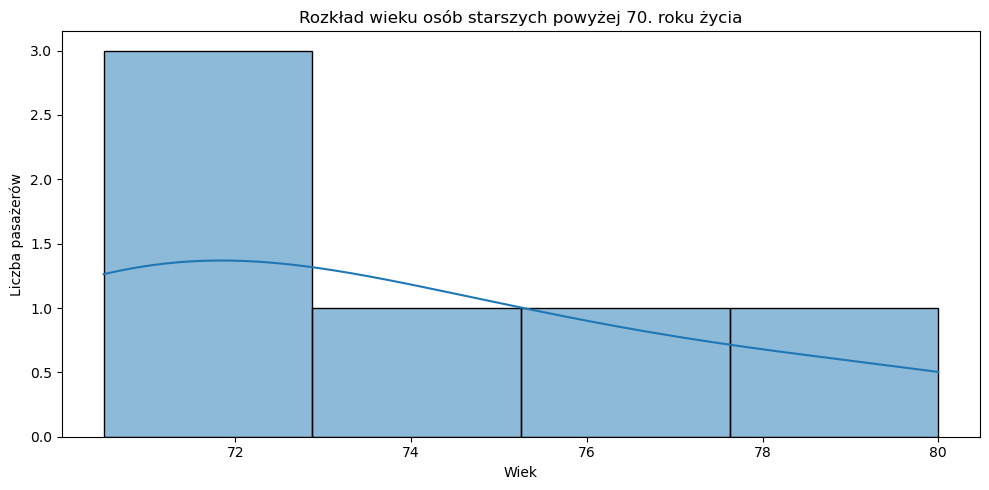

In [89]:
# tworzymy histogram dla wieku dzieci poniżej 10 roku życia i usuwamy wiersze z brakującymi wartościami
# tworzymy zmienną przechowującą informacje na temat dzieci poniżej 10 roku życia  i usuwamy wiersze z brakującymi wartościami
ages_children_counts = df_clear[(df_clear['Wiek'] > 70)] 

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(10, 5))

# tworzymy histogram
sns.histplot(ages_children_counts['Wiek'].dropna(), kde=True)
plt.title('Rozkład wieku osób starszych powyżej 70. roku życia')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

In [196]:
%%capture
ages_children_counts.describe()

In [197]:
%%capture
df_clear['Wiek'].describe()

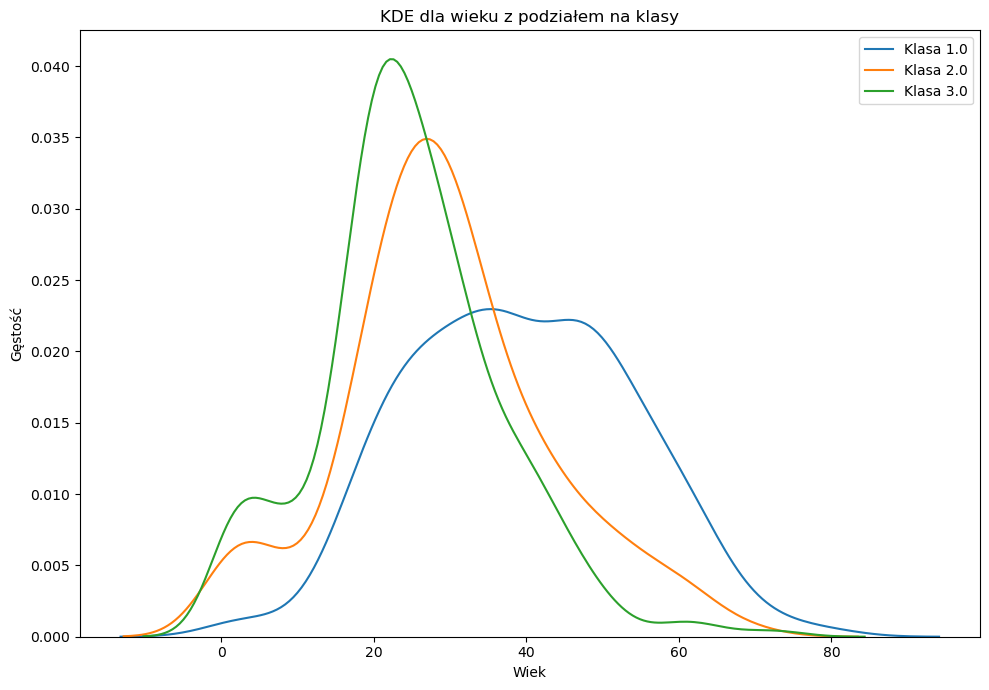

In [90]:
# Tworzenie przestrzeni dla wykresu
plt.figure(figsize=(10, 7))
colors_kde = ['deepskyblue', 'orange', 'lightgreen', 'purple', 'yellow']

# Iterowanie przez unikalne klasy i rysowanie wykresu KDE dla każdej z nich
for klasa in df_clear['Klasa'].unique():
    sns.kdeplot(df_clear[df_clear['Klasa'] == klasa]['Wiek'].dropna(), label=f'Klasa {klasa}')

# Ustawienia tytułów i etykiet osi
plt.title('KDE dla wieku z podziałem na klasy')
plt.xlabel('Wiek')
plt.ylabel('Gęstość')

# Dodanie legendy
plt.legend()

# Ustawiamy automatyczne dostosowanie
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

**Wnioski i spostrzeżenia**

Wiersze z brakującymi danymi (aż ok. 20%) zostały usunięte. Poniższe wnioski dotyczą pozostałych 80% pasażerów.
- Rozkład wieku pasażerów jest zbliżony do normalnego.
- Na statku najwięcej było 24-latków.
- Najstarszy pasażer miał 80 lat.
- Było 51 dzieci poniżej 5 roku życia, a najmłodsze miało ok. 2 miesięcy.
- W klasie 3. widzimy przewagę liczebną młodych ludzi, którzy często podróżowali z małymi dziećmi.

### 4.3. Przeżywalność i ciała ofiar

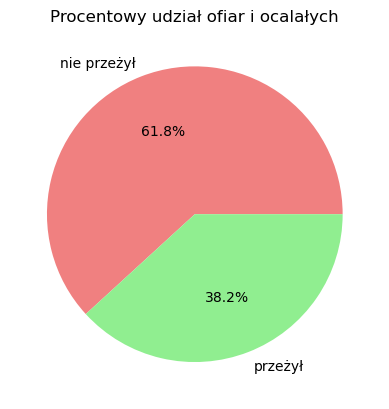

In [91]:
# sprawdzamy częstość występowania ofiar i ocalałych
survived_counts = df_clear['Czy przeżył str'].value_counts()

# wykres kołowy prezentujący udział procentowy ofiar i ocalałych bez podziału na klasy
survived_counts.plot.pie(autopct='%1.1f%%', labels=['nie przeżył', 'przeżył'], colors=['lightcoral', 'lightgreen'])
plt.title('Procentowy udział ofiar i ocalałych')
plt.ylabel('')
plt.plot()
plt.show()

In [200]:
%%capture
df_clear['Czy przeżył str'].value_counts()

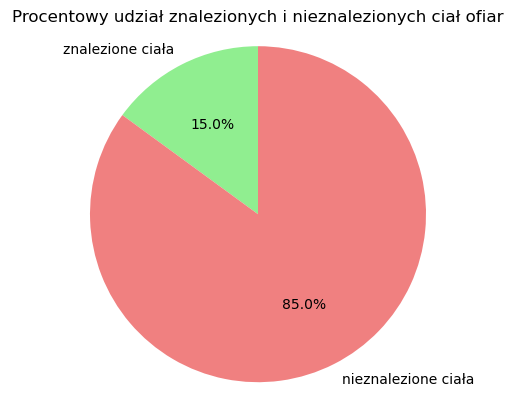

In [92]:
found_body_counts = df_clear['Nr ciała'].dropna().nunique()
dead_counts = (df_clear['Czy przeżył str'] == 'nie').sum()
unfound_body_counts = dead_counts - found_body_counts

# Dane do wykresu
counts = [found_body_counts, unfound_body_counts]
labels = ['znalezione ciała', 'nieznalezione ciała']
#colors = ['deepskyblue', 'orange', '#32CD32', 'purple', 'yellow']

# Tworzenie wykresu kołowego
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])

# Ustawienie osi na 'equal', aby zapewnić okrągły wykres
plt.axis('equal')

# Tytuł wykresu
plt.title('Procentowy udział znalezionych i nieznalezionych ciał ofiar')
plt.show()

**Wnioski i spostrzeżenia**

- Nie przeżyło katastrony aż 809 pasażerów, czyli niecałe 62%.
- Znaleziono ciała zaledwie ok. 15% ofiar.

### 4.4. Porty wejściowe

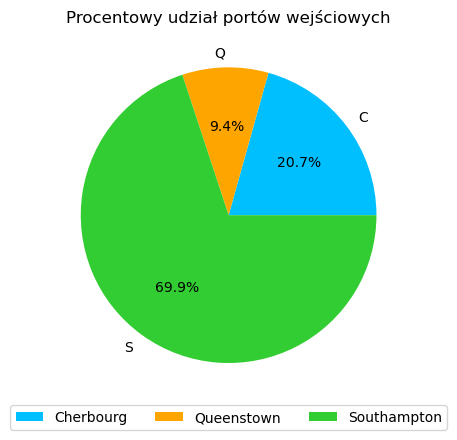

In [93]:
# sprawdzenie częstości występowania danego portu
port_counts = df_clear['Port wejścia'].value_counts().sort_index()
colors = ['deepskyblue', 'orange', '#32CD32', 'purple', 'yellow']
# wykres kołowy prezentujący udział procentowy poszczególnych portów
#plt.figure(figsize=(8, 12))
port_counts.plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Procentowy udział portów wejściowych')
plt.ylabel('')
plt.legend(labels=['Cherbourg', 'Queenstown', 'Southampton'],
           loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()

**spostrzeżenie**: Najwięcej, bo niemal 70% pasażerów, wsiadła w porcie w Southampton, a najmniej - niecałe 10% - w  Queenstown.

### 4.5. Porty docelowe

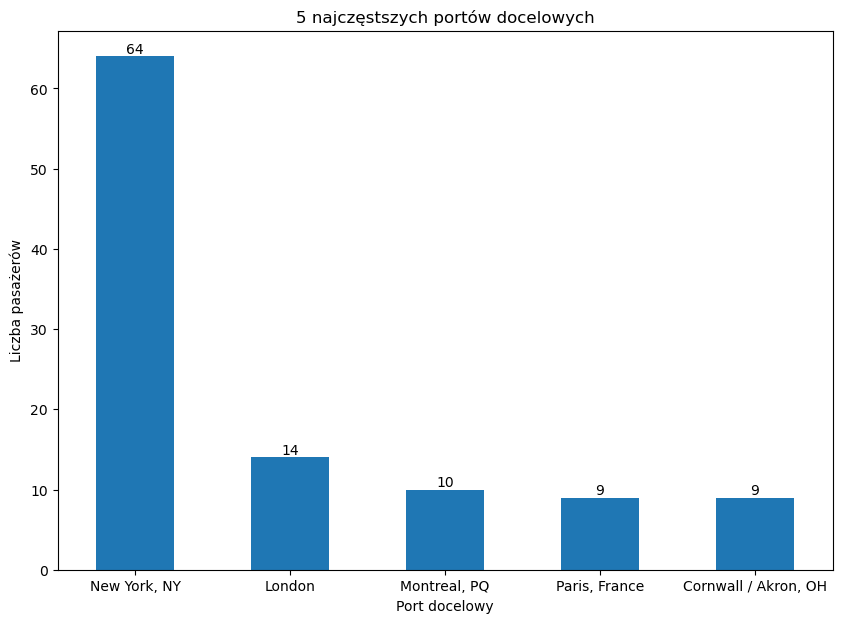

In [94]:
# sprawdzamy częstość występowania 5 najczęstszych portów docelowych
destination_counts = df_clear['Port docelowy'].value_counts().head(5).sort_values(ascending=False)

# Tworzenie wykresu słupkowego
ax = destination_counts.plot(kind='bar', figsize=(10, 7))

# Dodawanie wartości na słupkach
for index, value in enumerate(destination_counts):
    plt.text(index, value, str(value), va='bottom', ha='center', color='black')


# nadajemy tytuł i podpisujemy osie
plt.title('5 najczęstszych portów docelowych')
plt.xlabel('Port docelowy')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
plt.show()

**spostrzeżenie**: Zdecydowanie najczęstszym portem docelowym był port w Nowym Yorku.

### 4.6. Klasy biletowe

In [95]:
%%capture
for klasa in df_clear['Klasa'].unique():
    # Filtrowanie danych pasażerów dla danej klasy i usuwanie brakujących wartości
    fares = df_clear[df_clear['Klasa'] == klasa]['Cena'].dropna()
    print(fares.mode())
   

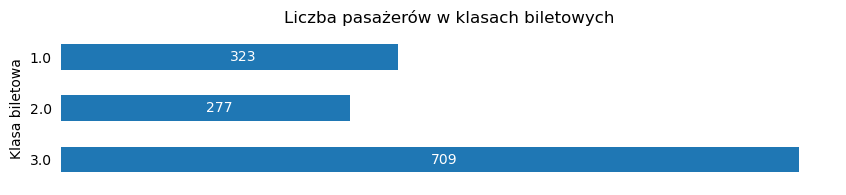

In [96]:
# wykres słupkowy prezentujący liczbę pasażerów w każdej klasie
class_counts = df_clear['Klasa'].value_counts().sort_index(ascending=False)


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(10,2))
ax = class_counts.plot(kind='barh')

# Dodawanie wartości na każdym słupku
for index, value in enumerate(class_counts):
    plt.text(value / 2, index, str(value), va='center', ha='left', color='white')

# Usuwanie osi x i ramki wokół wykresu
ax.get_xaxis().set_visible(False)  # Ukryj oś x
#ax.get_yaxis().set_visible(False)  # Ukryj oś y
ax.spines['top'].set_visible(False)  # Ukryj górną ramkę
ax.spines['right'].set_visible(False)  # Ukryj prawą ramkę
ax.spines['left'].set_visible(False)  # Ukryj lewą ramkę
ax.spines['bottom'].set_visible(False)  # Ukryj dolną ramkę

# Ukrywanie ticków osi y
ax.yaxis.set_ticks_position('none')

# Nadawanie tytułu i etykiet osi bez ich wyświetlania może być opcjonalne
plt.title('Liczba pasażerów w klasach biletowych')
plt.ylabel('Klasa biletowa')

plt.show()

### 4.7. Ceny biletów

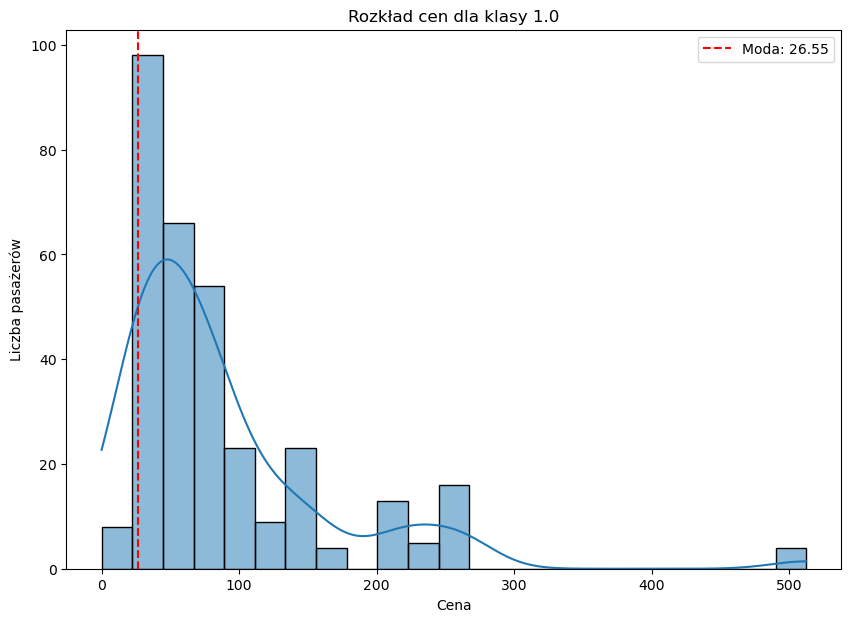

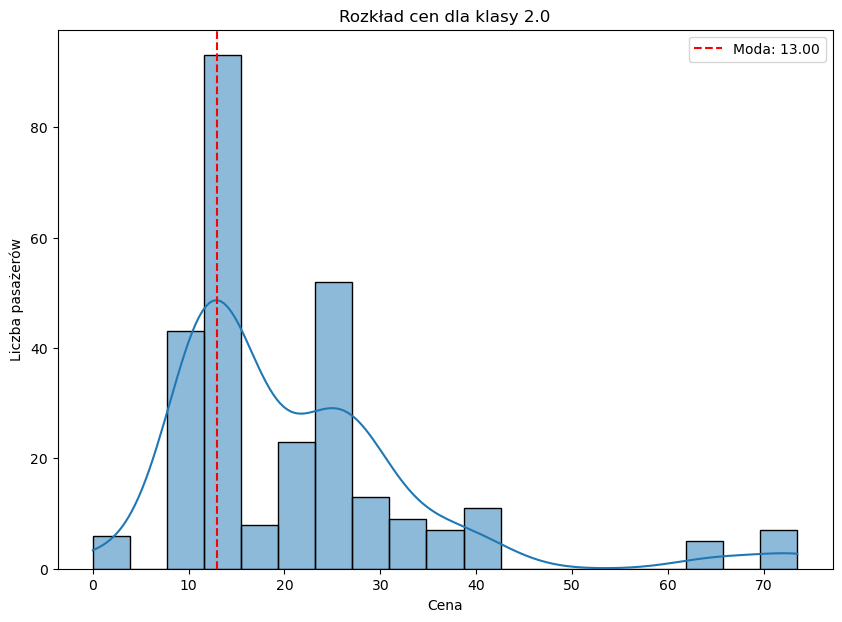

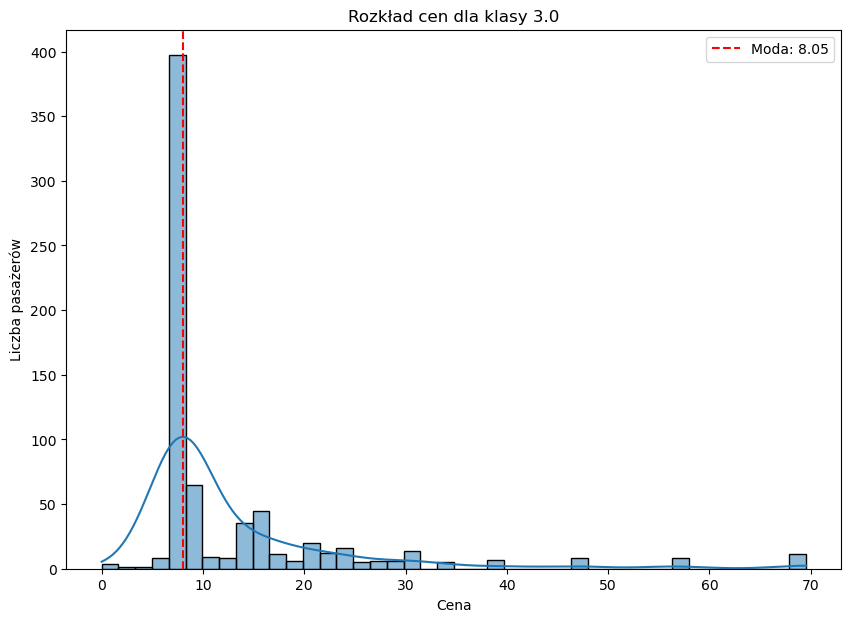

In [97]:
# tworzymy histogramy dla ceny w poszczególnych klasach biletów
# Iterowanie przez unikalne klasy i tworzenie histogramu dla każdej z nich
for klasa in df_clear['Klasa'].unique():
    # Filtrowanie danych pasażerów dla danej klasy i usuwanie brakujących wartości
    fares = df_clear[df_clear['Klasa'] == klasa]['Cena'].dropna()
    mode_value = fares.mode().iloc[0]

    # Tworzenie przestrzeni dla histogramu
    plt.figure(figsize=(10, 7))

    # Tworzenie histogramu z KDE
    sns.histplot(fares, kde=True)
    plt.axvline(mode_value, color='red', linestyle='--', label=f'Moda: {mode_value:.2f}')
    plt.legend()
    plt.title(f'Rozkład cen dla klasy {klasa}')
    plt.xlabel('Cena')
    plt.ylabel('Liczba pasażerów')

    # Wyświetlanie wykresu
    plt.show()



**Wnioski i spostrzeżenia**

- Ceny są bardzo zróżnicowane we wszystkich 3 klasach, jednak większość mieści się w przedziale 7-13.
- Moda (najczęściej występująca cena) wynosi 26,55 dla 1. klasy, 13 dla 2. klasy i 8.05 dla 3. klasy.
- Za darmo podróżowało 17 osób - można przypuszczać, że były to dzieci niespełna roczne.
- Zdecydowanie najbardziej od reszty odstaje cena ok. 500 - bilet o takiej wartości kupiły 4 osoby podróżujące zapewne w ekskluzywnych warunkach.

### 4.8. Liczebność rodzin

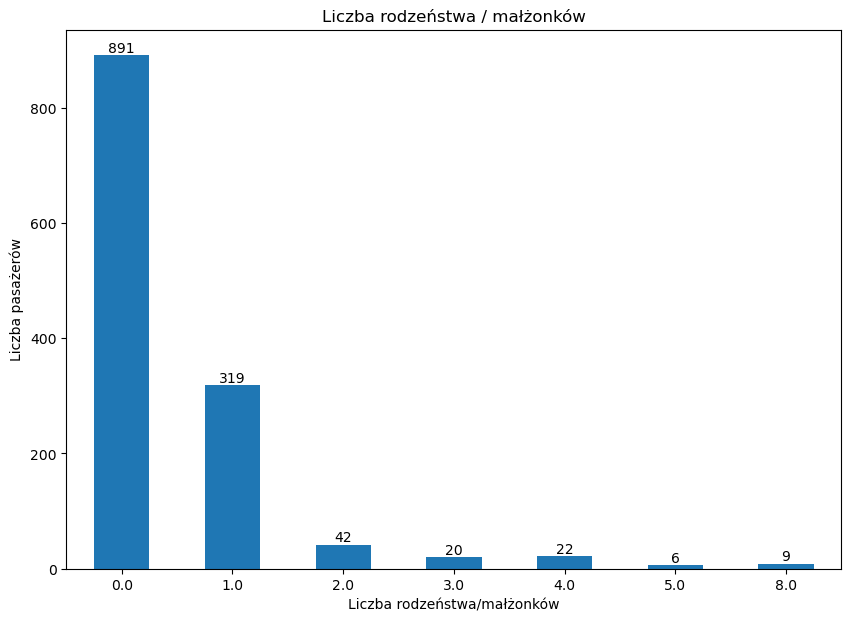

In [98]:
# wykres słupkowy prezentujący liczbę rodzeństwa lub małżeństwa pasażerów oraz liczbę pasażerów bez nich
# sprawdzamy częstość występowania indywidualnych pasażerów i kilkuosobowych rodzin
siblings_mariage_counts = df_clear['Rodzeństwo/małżonkowie'].value_counts().sort_index()

# Tworzenie wykresu słupkowego
ax = siblings_mariage_counts.plot(kind='bar', figsize=(10, 7))

# Dodawanie wartości na słupkach
for index, value in enumerate(siblings_mariage_counts):
    plt.text(index, value, str(value), va='bottom', ha='center', color='black')


# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodzeństwa / małżonków')
plt.xlabel('Liczba rodzeństwa/małżonków')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
plt.show()


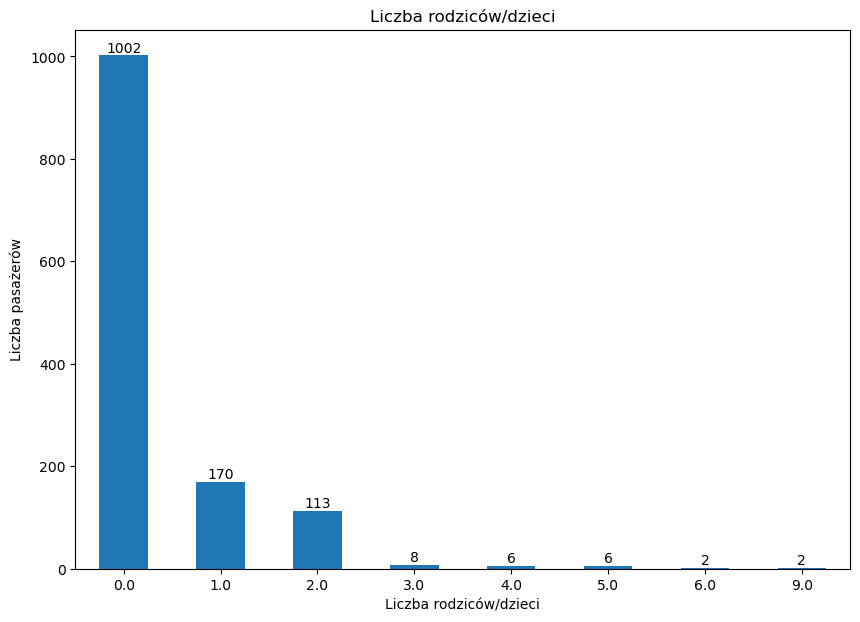

In [99]:
# wykres słupkowy prezentujący liczbę rodziców lub dzieci pasażerów oraz liczbę pasażerów bez nich
# sprawdzamy częstość występowania indywidualnych pasażerów i kilkuosobowych rodzin
parents_children_counts = df_clear['Rodzice/dzieci'].value_counts().sort_index()

# Tworzenie wykresu słupkowego
ax = parents_children_counts.plot(kind='bar', figsize=(10, 7))

# Dodawanie wartości na słupkach
for index, value in enumerate(parents_children_counts):
    plt.text(index, value, str(value), va='bottom', ha='center', color='black')


# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodziców/dzieci')
plt.xlabel('Liczba rodziców/dzieci')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
plt.show()

In [209]:
%%capture
filtered_family_df = df_clear[(df_clear['Rodzeństwo/małżonkowie'] > 7) & (df_clear['Rodzice/dzieci'] > 1)]
filtered_family_df

In [210]:
%%capture
filtered_alone_df = df_clear[(df_clear['Rodzeństwo/małżonkowie'] == 0) & (df_clear['Rodzice/dzieci'] == 0)]
filtered_alone_df

**Wnioski i spostrzeżenia**

- Osób podróżujących bez żadnego członka rodziny było aż 790. Może podróżowali sami, a może ze znajomymi.
- Najliczniejsza rodzina o nazwisku 'Sage' liczyła 11 osób.

## 5. Wartości odstające
Analizę wartości odstających wykonamy kolejno dla ceny i wieku, czyli kolumn, w których występuje co najmniej kilkadziesiąt unikatowych wartości i niektóre z nich się powtarzają.
### 5.1. Cena

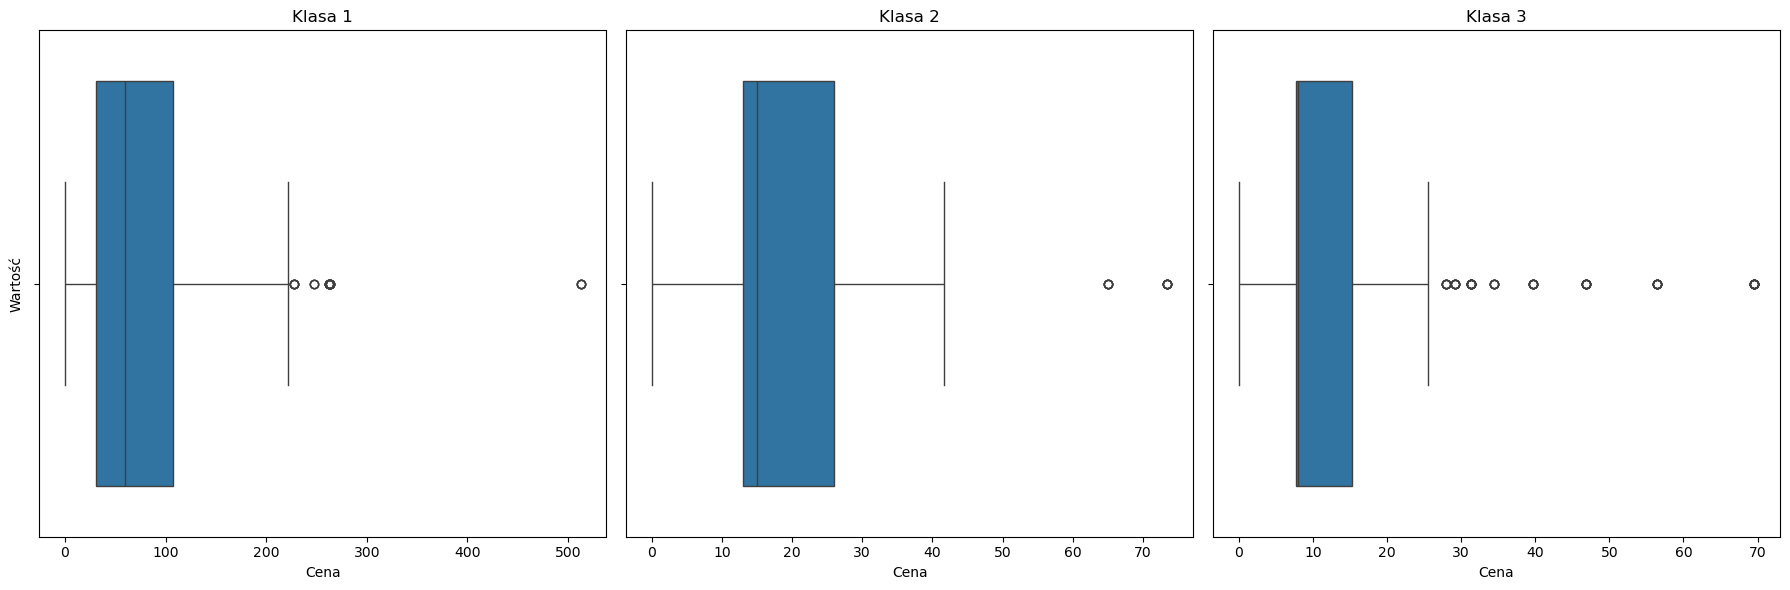

In [100]:
# Tworzenie przestrzeni dla 3 sub-wykresów w 1 wierszu
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Lista klas
klasy = [1, 2, 3]

# Iterowanie przez klasy i tworzenie wykresu wartości odstających dla każdej klasy
for i, klasa in enumerate(klasy):
    sns.boxplot(
        x=df_clear[df_clear['Klasa'] == klasa]['Cena'],
        ax=axes[i]
    )
    axes[i].set_title(f'Klasa {klasa}')
    axes[i].set_xlabel('Cena')
    if i == 0:  # Dodaje etykietę osi y tylko do pierwszego wykresu
        axes[i].set_ylabel('Wartość')

# Ustawiamy automatyczne dostosowanie
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

**Wnioski i spostrzeżenia**

- Wartości odstające występują w każdej z 3 klas.
- W 3. klasie biletowej większość cen mieści się w wąskim przedziale, dlatego też mamy tu najwięcej wartości odstających.

### 5.2. Wiek

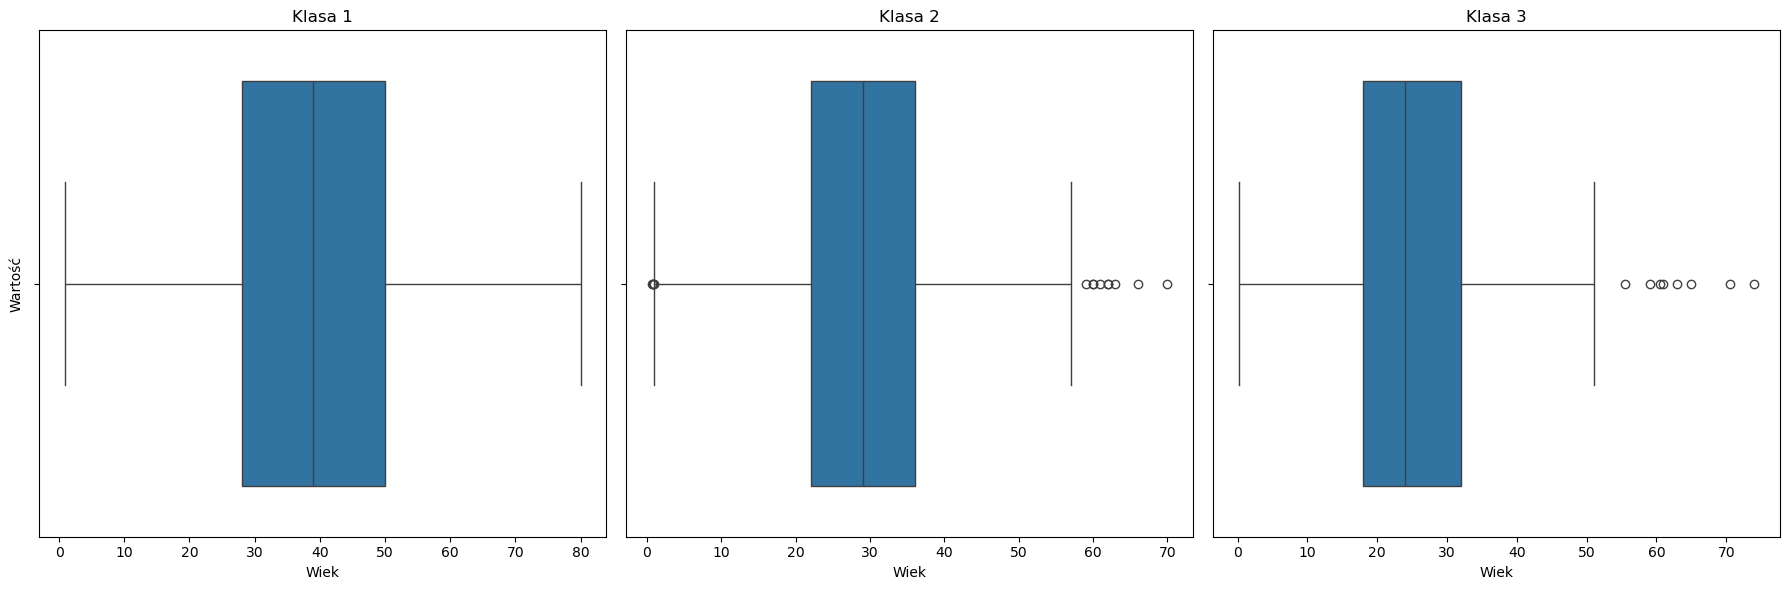

In [101]:
# Tworzenie przestrzeni dla 3 sub-wykresów w 1 wierszu
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Lista klas
klasy = [1, 2, 3]

# Iterowanie przez klasy i tworzenie wykresu wartości odstających dla każdej klasy
for i, klasa in enumerate(klasy):
    sns.boxplot(
        x=df_clear[df_clear['Klasa'] == klasa]['Wiek'],
        ax=axes[i]
    )
    axes[i].set_title(f'Klasa {klasa}')
    axes[i].set_xlabel('Wiek')
    if i == 0:  # Dodaje etykietę osi y tylko do pierwszego wykresu
        axes[i].set_ylabel('Wartość')

# Ustawiamy automatyczne dostosowanie
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

**Wnioski i spostrzeżenia**

- Wiek pasażerów jest bardzo rozproszony co nie powinno dziwić, ponieważ podróżowali zarówno rodzice z niemowlakami, jak i emeryci.
- Zastanawiający jest fakt, że w 1. klasie biletowej nie dostrzegamy wartości odstających. Może to sugerować, że nie występuje w niej duża liczba pasażerów będących w wąskim przedziale wiekowym.

## 6. Analiza relacji między kolumnami

### 6.1. Przeżycie w zależności od klasy biletowej i płci

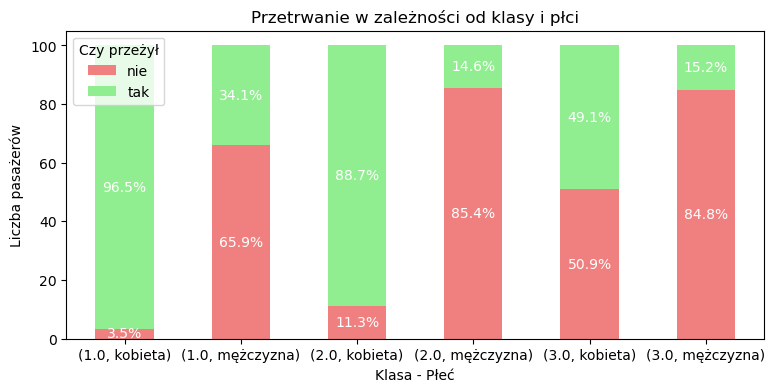

In [102]:
grouped_survive_counts = df_clear.groupby(['Klasa', 'Płeć', 'Czy przeżył str']).size().unstack(fill_value=0)
colors_survive = ['lightcoral', 'lightgreen']
# Tworzenie wykresu
#grouped_survived_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors_survive)

# Obliczanie procentowego udziału dla każdej płci w ramach klasy
percent_survive_data = grouped_survive_counts.div(grouped_survive_counts.sum(axis=1), axis=0) * 100

# Tworzenie wykresu procentowego
ax = percent_survive_data.plot(kind='bar', stacked=True, figsize=(9, 4), color=colors_survive)

# Dodawanie wartości procentowych nad słupkami wykresu
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' if v > 0 else '' for v in container.datavalues], label_type='center', color='white')

# Dodatkowe etykiety i tytuł
plt.title('Przetrwanie w zależności od klasy i płci')
plt.xlabel('Klasa - Płeć')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
plt.legend(title='Czy przeżył')

plt.show()

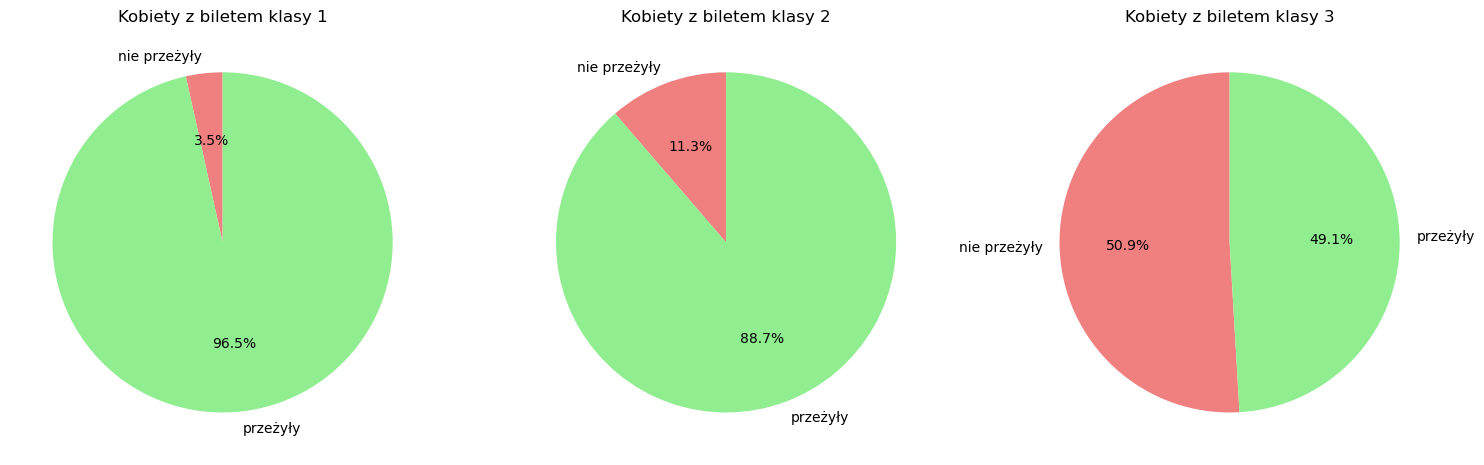

In [103]:
women_passenger = df_clear[df_clear['Płeć'] == 'kobieta']

survive_by_class = women_passenger.groupby(['Klasa', 'Czy przeżył int']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
klasy = [1.0, 2.0, 3.0]
colors = colors_survive

for i, klasa in enumerate(klasy):
    if klasa in survive_by_class.index:
        data = survive_by_class.loc[klasa]
        axes[i].pie(data, labels=['nie przeżyły', 'przeżyły'], colors=colors, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Kobiety z biletem klasy {int(klasa)}')

plt.tight_layout()

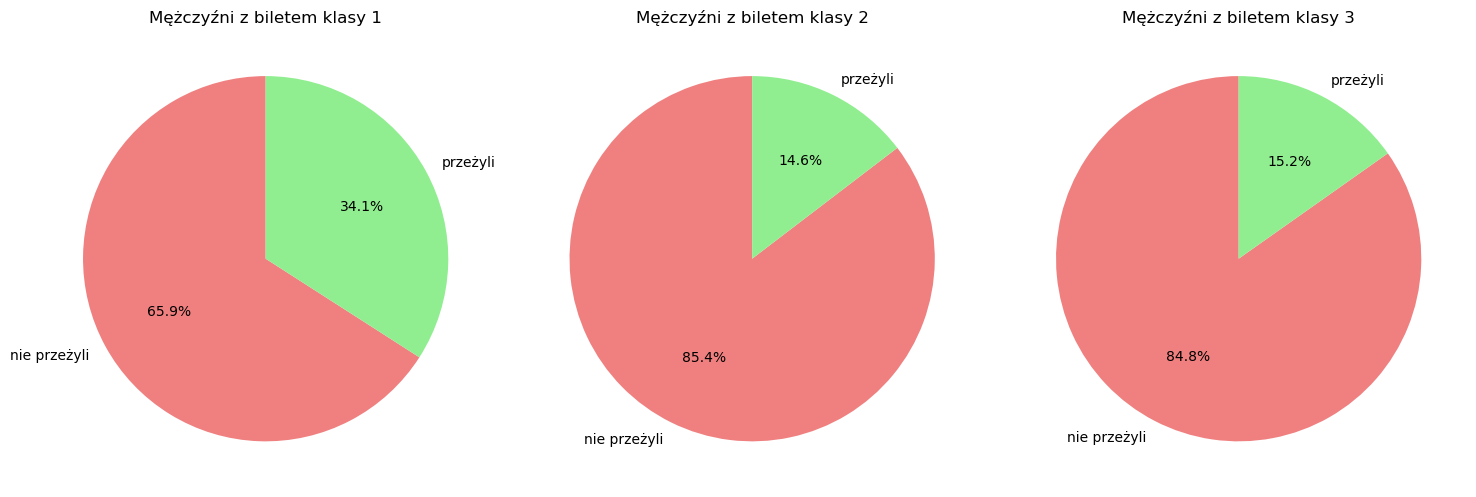

In [104]:
men_passenger = df_clear[df_clear['Płeć'] == 'mężczyzna']

survive_by_class = men_passenger.groupby(['Klasa', 'Czy przeżył int']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
klasy = [1.0, 2.0, 3.0]
colors = colors_survive

for i, klasa in enumerate(klasy):
    if klasa in survive_by_class.index:
        data = survive_by_class.loc[klasa]
        axes[i].pie(data, labels=['nie przeżyli', 'przeżyli'], colors=colors, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Mężczyźni z biletem klasy {int(klasa)}')

plt.tight_layout()

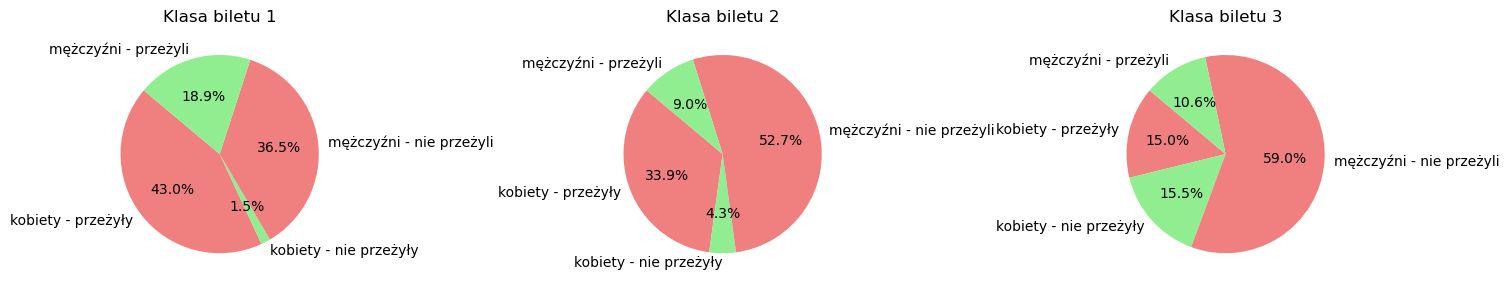

In [105]:
grouped_class = df.groupby('Klasa')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for (klasa, group), ax in zip(grouped_class, axes):
    przeżyli_counts = group.groupby(['Płeć', 'Czy przeżył int']).size().unstack(fill_value=0)
    
    labels = ['kobiety - przeżyły', 'kobiety - nie przeżyły', 'mężczyźni - nie przeżyli', 'mężczyźni - przeżyli']
    sizes = [
        przeżyli_counts.loc['kobieta', 1] if 'kobieta' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['kobieta', 0] if 'kobieta' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['mężczyzna', 0] if 'mężczyzna' in przeżyli_counts.index else 0,
        przeżyli_counts.loc['mężczyzna', 1] if 'mężczyzna' in przeżyli_counts.index else 0
    ]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors_survive)
    ax.set_title(f'Klasa biletu {int(klasa)}')

plt.tight_layout()

**Wnioski i spostrzeżenia**

- Szanse przeżycia kobiet znacznie wzrastały, gdy były w 1. klasie biletowej (przeżyło ok. 96,5%) lub w 2. klasie biletowej (przeżyło ok. 88,7%). W 3. klasie przeżyło już tylko ok. 49% kobiet.
- Mężczyźni, niezależnie od klasy, w znacznej większości zginęli - w 1. klasie zginęło ok. 66%, a w 2. i 3. klasie po ok. 85%. 
- Jedynie w 1. klasie biletowej więcej pasażerów przeżyło niż zginęło.

### 6.2. Liczebność łodzi ratunkowych w klasach z podziałem na płci

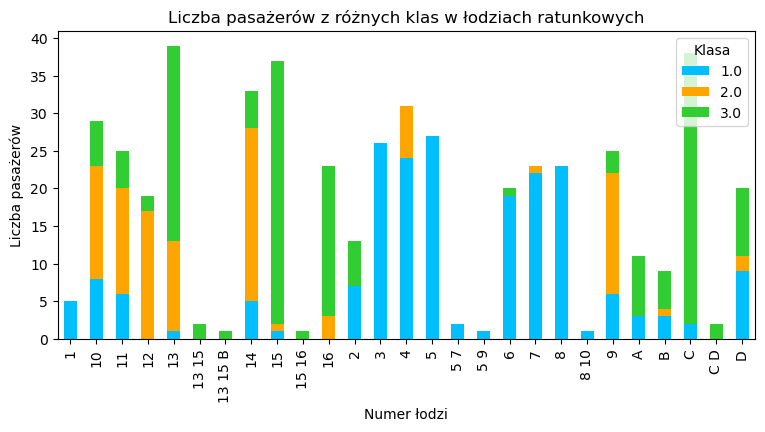

In [106]:
# Przygotowanie danych
grouped_data = df_clear.groupby(['Nr łodzi', 'Klasa']).size().unstack(fill_value=0)
colors = ['deepskyblue', 'orange', '#32CD32', 'purple', 'yellow']
# Tworzenie wykresu
grouped_data.plot(kind='bar', stacked=True, figsize=(9, 4), color=colors)
plt.title('Liczba pasażerów z różnych klas w łodziach ratunkowych')
plt.xlabel('Numer łodzi')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Klasa')
plt.show()

**Spostrzeżenia i wnioski dotyczące przypisania do łodzi**

- W łodziach ratunkowych znajduje się najwięcej pasażerów z klasy 1.
- Na ok. 1/3 wszystkich łodzi nie ma choćby 1 pasażera z klasy 3., która jest zdecydowanie najliczniejsza.

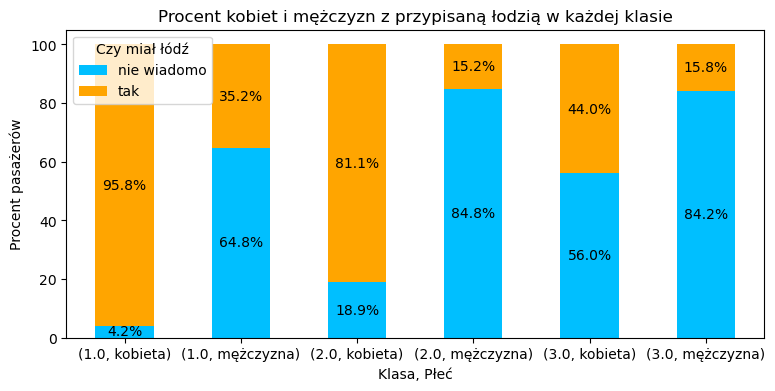

In [107]:
# Grupowanie danych i liczenie pasażerów w każdej klasie i płci oraz mających łódź
group_boat_data = df_clear.groupby(['Klasa', 'Płeć', 'Czy miał łódź']).size().unstack(fill_value=0)

# Obliczanie procentowego udziału dla każdej płci w ramach klasy
percent_data = group_boat_data.div(group_boat_data.sum(axis=1), axis=0) * 100

# Tworzenie wykresu procentowego
ax = percent_data.plot(kind='bar', stacked=True, figsize=(9, 4), color=colors)

# Dodawanie wartości procentowych nad słupkami wykresu
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' if v > 0 else '' for v in container.datavalues], label_type='center')

plt.title('Procent kobiet i mężczyzn z przypisaną łodzią w każdej klasie')
plt.xlabel('Klasa, Płeć')
plt.ylabel('Procent pasażerów')
plt.legend(title='Czy miał łódź')
plt.xticks(rotation=0)

plt.show()

**Wnioski dotyczące przypisania do łodzi w zależności od klasy i płci**

- Aż niemal 96% kobiet w 1. klasie było przypisanych do łodzi ratunkowej.
- W każdej z 3 klas ponad połowa mężczyzn nie ma podanej informacji o łodzi ratunkowej.

### 6.3. Przeżycie w zależności od płci i łodzi ratunkowej

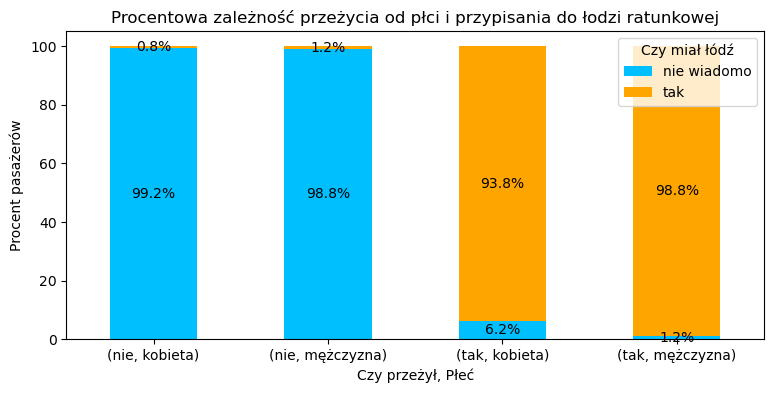

In [108]:
# Grupowanie danych i liczenie pasażerów w każdej klasie i płci oraz mających łódź
group_boat_survive = df_clear.groupby(['Czy przeżył str', 'Płeć', 'Czy miał łódź']).size().unstack(fill_value=0)

# Obliczanie procentowego udziału dla każdej płci w ramach klasy
percent_data = group_boat_survive.div(group_boat_survive.sum(axis=1), axis=0) * 100

# Tworzenie wykresu procentowego
ax = percent_data.plot(kind='bar', stacked=True, figsize=(9, 4), color=colors)

# Dodawanie wartości procentowych nad słupkami wykresu
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' if v > 0 else '' for v in container.datavalues], label_type='center')

plt.title('Procentowa zależność przeżycia od płci i przypisania do łodzi ratunkowej')
plt.xlabel('Czy przeżył, Płeć')
plt.ylabel('Procent pasażerów')
plt.legend(title='Czy miał łódź')
plt.xticks(rotation=0)

plt.show()


**Wnioski dotyczące przeżycia w zależności od płci i łodzi ratunkowej**

- Ponad 99% poległych kobiet nie ma informacji o przypisaniu do łodzi ratunkowej - prawdopodobnie nie były przypisane do żadnej łodzi ratunkowej.
- Prawie 99% ocalałych mężczyzn było przypisanych do jakiejś łodzi.
- Wśród ocalałych kobiet aż 6,2% prawdopodobnie nie było przypisane do łodzi ratunkowej.
- Po analizie powyższego wykresu, można postawić odważną tezę, że brak numeru łodzi ratunkowej w danych oznacza brak przypisania do jakiejkolwiek łodzi ratunkowej.

### 6.4. Pasażerowie z najdroższymi biletami

In [114]:
def highlight_high_prices(value):
    # Zastosowanie stylu dla wartości powyżej 500
    return ['color: green' if v > 500 else '' for v in value]
# filtrowanie danych po cenie i przeżywalności 

df_elite = df_clear[(df_clear['Cena'] > 500) & (df_clear['Czy przeżył str'] == 'tak')]

# Zastosowanie stylu do kolumny 'Cena'
styled_df_elite = df_elite.style.apply(highlight_high_prices, subset=['Cena'])

styled_df_elite

,Imię i nazwisko,Czy przeżył str,Klasa,Płeć,Wiek,Rodzeństwo/małżonkowie,Rodzice/dzieci,Cena,Nr biletu,Nr kabiny,Port wejścia,Nr łodzi,Nr ciała,Port docelowy,Czy przeżył int,Czy miał łódź
49,"Cardeza, Mr. Thomas Drake Martinez",tak,1.000000,mężczyzna,36.000000,0.000000,1.000000,512.329200,PC 17755,B51 B53 B55,C,3,nan,"Austria-Hungary / Germantown, Philadelphia, PA",1.000000,tak
50,"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",tak,1.000000,kobieta,58.000000,0.000000,1.000000,512.329200,PC 17755,B51 B53 B55,C,3,nan,"Germantown, Philadelphia, PA",1.000000,tak
183,"Lesurer, Mr. Gustave J",tak,1.000000,mężczyzna,35.000000,0.000000,0.000000,512.329200,PC 17755,B101,C,3,nan,nan,1.000000,tak
302,"Ward, Miss. Anna",tak,1.000000,kobieta,35.000000,0.000000,0.000000,512.329200,PC 17755,nan,C,3,nan,nan,1.000000,tak


**spostrzeżenie**: Przeżyli wszyscy 4 pasażerowie ze zdecydowanie najdroższymi biletami.

In [ ]:
#%%capture
df_filterki = df_clear[(df_clear['Nr łodzi'].isna()) & (df_clear['Klasa'] == 3.0) & (df_clear['Płeć'] == 'mężczyzna') & (df_clear['Czy przeżył str'] == 'tak')]
df_filterki

## 7. Podsumowanie i wnioski ostateczne
### 7.1. Odpowiedzi na pytania
Po obszernej analizie danych, w końcu jesteśmy w stanie odpowiedzieć na trudne
pytania odnośnie pasażerów Titanica i ich szans przeżycia.
Pierwsze pytanie to **Czy o przeżyciu pasażera decydował jedynie łut szczęścia?**
Nie, powyższe dane zdecydowanie temu zaprzeczają! Na wykresach zależności przeżycia od m.in. płci, klasy czy przypisania do łodzi ratunkowej widzimy wyraźne korelacje między tymi cechami.
Dociekiwać można również **Czy niektórzy pasażerowie byli pewni przeżycia?**
Tak, możemy stwierdzić, że pewność przeżycia dawało przynależenie do 1 z 2 grup:
- pasażerowie, którzy kupili bilet za cenę wyższą niż 500 - było ich 4 - w tym 2 mężczyzn i wszyscy byli przypisani do łodzi ratunkowych
- kobiety z 1. lub 2. klasy biletowej, które były przypisane do łodzi ratunkowej 
Kolejne zapytanie może brzmieć **Czy przeżyły wszystkie dzieci?**
Nie, spośród 51 dzieci poniżej 5. roku życia aż 18 zmarło.
### 7.2. Wnioski ogólne
- Pasażerowie podróżujący w klasie 1. płacili najwięcej za bilety, ale to właśnie w tej klasie najwięcej osób przeżyło.
- Aż ok. 56% kobiet z 3. klasy biletowej nie było przypisane do żadnej łodzi ratunkowej i w większości zmarły, a z pozostałych 44% zmarła tylko 1 kobieta!
- Dane pokazują olbrzymie poświęcenie mężczyzn - niektórzy nie przeżyli, mimo posiadania biletu z 1. klasy i przypisania do łodzi ratunkowej.
- Warunki musiały być bardzo trudne, ponieważ znaleziono zaledwie 121 ciał spośród 809 ofiar.


In [118]:
!jupyter nbconvert titanic.ipynb --to html --no-input --no-prompt --output titanic.html

[NbConvertApp] Converting notebook titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 1381565 bytes to titanic.html
